In [42]:
import wandb
import pandas as pd
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


data_dir = pathlib.Path("./results/phcd_paper")

train_data = pd.read_csv(data_dir / "train_accuracy.csv")
val_data = pd.read_csv(data_dir / "val_accuracy.csv")

# drop column calld Step
#train_data = train_data.drop(columns=["Step"])
#val_data = val_data.drop(columns=["Step"])

# remove "Name: "
train_data.columns = [ c.replace("Name: ", "") for c in train_data.columns ]
val_data.columns = [ c.replace("Name: ", "") for c in val_data.columns ]

# replace accuracy__MIN with "min" and accuracy__MAX with "max"
train_data.columns = [ c.replace("accuracy__MIN", "min") for c in train_data.columns ]
train_data.columns = [ c.replace("accuracy__MAX", "max") for c in train_data.columns ]
val_data.columns = [ c.replace("val_accuracy__MAX", "max") for c in val_data.columns ]
val_data.columns = [ c.replace("val_accuracy__MIN", "min") for c in val_data.columns ]
val_data.columns = [ c.replace("val_accuracy", "accuracy") for c in val_data.columns ]

train_data.head()

,Step,architecture-1 - accuracy,architecture-1 - min,architecture-1 - max,architecture-4 - accuracy,architecture-4 - min,architecture-4 - max,architecture-2 - accuracy,architecture-2 - min,architecture-2 - max,...,architecture-5 - max,architecture-baseline - accuracy,architecture-baseline - min,architecture-baseline - max,architecture-6 - accuracy,architecture-6 - min,architecture-6 - max,architecture-7 - accuracy,architecture-7 - min,architecture-7 - max
0,0,0.744503,0.739030,0.748009,0.715856,0.710543,0.719302,0.758820,0.756671,0.761000,...,0.726904,0.714462,0.710814,0.716691,0.741458,0.740082,0.743852,0.629820,0.624874,0.635152
1,1,0.808745,0.806097,0.810786,0.799723,0.797744,0.802651,0.814407,0.813402,0.815122,...,0.783057,0.781464,0.779496,0.783059,0.791023,0.789771,0.792919,0.719801,0.717925,0.722299
2,2,0.832765,0.829167,0.835856,0.838771,0.835347,0.843410,0.832853,0.831814,0.833841,...,0.796019,0.793074,0.790795,0.795259,0.803500,0.802267,0.804755,0.736086,0.734909,0.738234
3,3,0.852263,0.847544,0.856915,0.870693,0.866519,0.877971,0.847492,0.846248,0.848593,...,0.803665,0.799848,0.797558,0.802175,0.810877,0.809977,0.812028,0.744531,0.743407,0.746105
4,4,0.869558,0.862971,0.875391,0.896677,0.890611,0.904280,0.860111,0.857391,0.862328,...,0.809007,0.803930,0.801837,0.806248,0.816069,0.815017,0.817306,0.749799,0.748416,0.750804


In [49]:
models = ["architecture-1", "architecture-2", "architecture-4", "architecture-5", "architecture-6", "architecture-7", "architecture-baseline"]
model_labels = ["Architektura A", "Architektura B", "Architektura C", "Architektura D", "Architektura E", "Architektura F", "Architektura Bazowa"]

Text(0.5, 0.98, 'Dokładność na zbiorze wszystkich znaków')

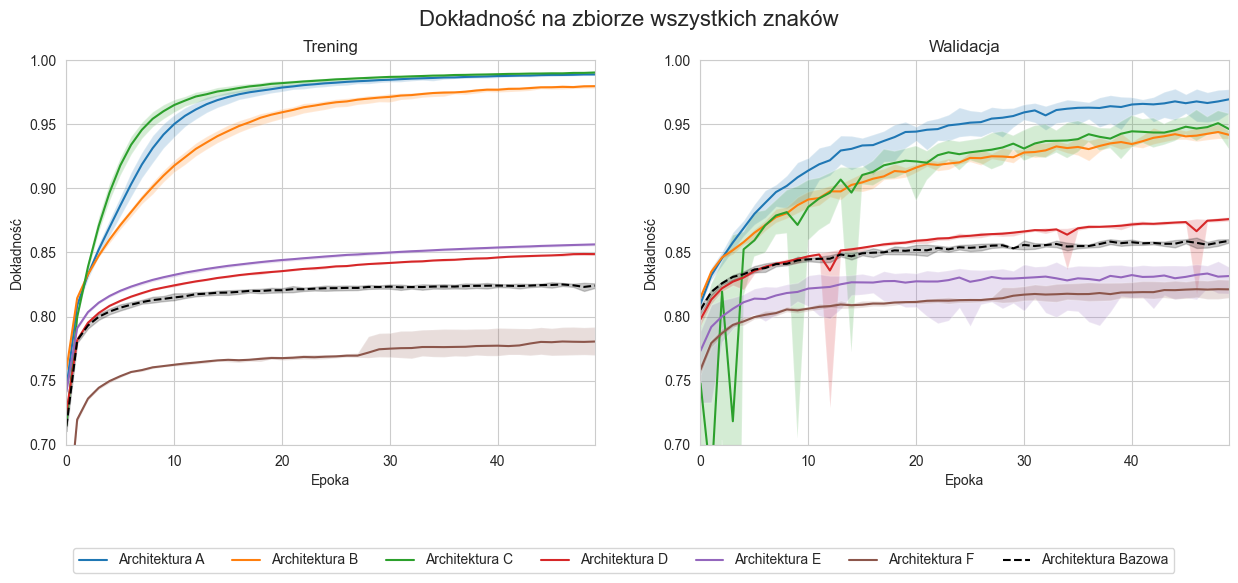

In [77]:
# plot the train and validation results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


# plot the train results
for model, label in zip(models, model_labels):
    median_acc = train_data[f"{model} - accuracy"]
    min_acc = train_data[f"{model} - min"]
    max_acc = train_data[f"{model} - max"]

    if label == "Architektura Bazowa":
        ax[0].plot(median_acc, label=label, linestyle="--", color="black")
        ax[0].fill_between(range(len(median_acc)), min_acc, max_acc, alpha=0.2, color="black")
        continue

    ax[0].plot(median_acc, label=label)
    ax[0].fill_between(range(len(median_acc)), min_acc, max_acc, alpha=0.2)

ax[0].set_title("Trening")
ax[0].set_xlabel("Epoka")
ax[0].set_ylabel("Dokładność")

# plot the validation results
for model, label in zip(models, model_labels):
    median_acc = val_data[f"{model} - accuracy"]
    min_acc = val_data[f"{model} - min"]
    max_acc = val_data[f"{model} - max"]

    if label == "Architektura Bazowa":
        ax[1].plot(median_acc, label=label, linestyle="--", color="black")
        ax[1].fill_between(range(len(median_acc)), min_acc, max_acc, alpha=0.2, color="black")
        continue

    ax[1].plot(median_acc, label=label)
    ax[1].fill_between(range(len(median_acc)), min_acc, max_acc, alpha=0.2)

ax[1].set_title("Walidacja")
ax[1].set_xlabel("Epoka")
ax[1].set_ylabel("Dokładność")

# set y axis to 0.7-1.0
ax[0].set_ylim(0.7, 1.0)
ax[1].set_ylim(0.7, 1.0)

# set x axis to 0-50
ax[0].set_xlim(0, 49)
ax[1].set_xlim(0, 49)

# display legend under the plot
ax[1].legend(loc='center left', fancybox=True, ncol=len(model_labels), bbox_to_anchor=(-1.2, -0.3))

fig.suptitle("Dokładność na zbiorze wszystkich znaków", fontsize=16)

In [125]:
model_flops = pd.read_csv(data_dir / "model_flops.csv")
num_parameters = pd.read_csv(data_dir / "num_parameters.csv")
compressed_disk_size = pd.read_csv(data_dir / "compressed_disk_size.csv")

for data in [model_flops, num_parameters, compressed_disk_size]:
    data.columns = [ c.replace("Name: ", "") for c in data.columns ]
    # remove Step column
    #data = data.drop(columns=["Step"])
# remove step column
model_flops = model_flops.drop(columns=["Step"])
num_parameters = num_parameters.drop(columns=["Step"])
compressed_disk_size = compressed_disk_size.drop(columns=["Step"])

# remove columns wth "MIN" and "MAX" in the name
model_flops = model_flops[[c for c in model_flops.columns if "MIN" not in c and "MAX" not in c]]
num_parameters = num_parameters[[c for c in num_parameters.columns if "MIN" not in c and "MAX" not in c]]
compressed_disk_size = compressed_disk_size[[c for c in compressed_disk_size.columns if "MIN" not in c and "MAX" not in c]]

# transpose the dataframes
model_flops = model_flops.T
num_parameters = num_parameters.T
compressed_disk_size = compressed_disk_size.T

# split into 
model_flops

summary_df = pd.DataFrame(columns=["model", "gflops", "num_parameters", "compressed_disk_size"])

for model, label in zip(models, model_labels):
    summary_df = summary_df.append({
        "model": label,
        "gflops": model_flops.loc[f"{model} - model_flops"][0],
        "num_parameters": num_parameters.loc[f"{model} - num_parameters"][0],
        "compressed_disk_size": compressed_disk_size.loc[f"{model} - compressed_disk_size"][0]
    }, ignore_index=True)

summary_df

/tmp/ipykernel_22194/737182552.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({
/tmp/ipykernel_22194/737182552.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({
/tmp/ipykernel_22194/737182552.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({
/tmp/ipykernel_22194/737182552.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({
/tmp/ipykernel_22194/737182552.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum

,model,gflops,num_parameters,compressed_disk_size
0,Architektura A,0.017223,13831385,5.189235e+07
1,Architektura B,0.005713,1779161,6.707222e+06
2,Architektura C,0.021186,6455897,2.404684e+07
3,Architektura D,0.004004,474377,1.776690e+06
4,Architektura E,0.001683,87929,3.306880e+05
5,Architektura F,0.001312,111961,4.201607e+05
6,Architektura Bazowa,0.014308,497721,1.869020e+06


In [212]:
summary_df["milions of flops"] = summary_df["gflops"].map(lambda x: x * 1000)
summary_df["milions of parameters"] = summary_df["num_parameters"].map(lambda x: x / 1000)
summary_df["compressed disk size (MB)"] = summary_df["compressed_disk_size"].map(lambda x: x / 1000000)

summary_df

,model,gflops,num_parameters,compressed_disk_size,milions of flops,thousands of parameters,compressed disk size (MB),milions of parameters
0,Architektura A,0.017223,13831385,5.189235e+07,17.222891,13831.385,51.892352,13831.385
1,Architektura B,0.005713,1779161,6.707222e+06,5.713035,1779.161,6.707222,1779.161
2,Architektura C,0.021186,6455897,2.404684e+07,21.186220,6455.897,24.046845,6455.897
3,Architektura D,0.004004,474377,1.776690e+06,4.004109,474.377,1.776690,474.377
4,Architektura E,0.001683,87929,3.306880e+05,1.682988,87.929,0.330688,87.929
5,Architektura F,0.001312,111961,4.201607e+05,1.312411,111.961,0.420161,111.961
6,Architektura Bazowa,0.014308,497721,1.869020e+06,14.308427,497.721,1.869020,497.721


In [218]:
final_summary = summary_df[["model", "milions of flops", "milions of parameters", "compressed disk size (MB)"]]

# sort like this: Baseline, A, B, C, D, E, F

final_summary = final_summary.sort_values(by=["model"], key=lambda x: x.map({
    "Architektura Bazowa": 0,
    "Architektura A": 1,
    "Architektura B": 2,
    "Architektura C": 3,
    "Architektura D": 4,
    "Architektura E": 5,
    "Architektura F": 6
}))

final_summary

,model,milions of flops,milions of parameters,compressed disk size (MB)
6,Architektura Bazowa,14.308427,497.721,1.869020
0,Architektura A,17.222891,13831.385,51.892352
1,Architektura B,5.713035,1779.161,6.707222
2,Architektura C,21.186220,6455.897,24.046845
3,Architektura D,4.004109,474.377,1.776690
4,Architektura E,1.682988,87.929,0.330688
5,Architektura F,1.312411,111.961,0.420161


# Other charts

In [172]:
results_all = pd.read_excel(data_dir.parent / "Praca magisterska - wyniki.xlsx", sheet_name="Wszystkie litery")

results_all.columns = [
    "Architektura Bazowa",
    "Architektura A",
    "Architektura B",
    "Architektura C",
    "Architektura D",
    "Architektura E",
    "Architektura F",
]

results_all

,Architektura Bazowa,Architektura A,Architektura B,Architektura C,Architektura D,Architektura E,Architektura F
0,0.8608,0.9586,0.9609,0.9503,0.8749,0.8385,0.8154
1,0.8578,0.9768,0.9572,0.9573,0.8754,0.8372,0.8281
2,0.8591,0.9730,0.9550,0.9337,0.8783,0.8325,0.8278
3,0.8605,0.9705,0.9526,0.9552,0.8764,0.8381,0.8263
4,0.8595,0.9716,0.9505,0.9579,0.8744,0.8372,0.8281
5,0.8603,0.9693,0.9504,0.9305,0.8767,0.8273,0.8245
6,0.8589,0.9705,0.9501,0.9579,0.8888,0.8339,0.8272
7,0.8586,0.9773,0.9501,0.9573,0.8875,0.8372,0.8146
8,0.8583,0.9762,0.9497,0.9582,0.8889,0.8399,0.8281
9,0.8578,0.9754,0.9489,0.9572,0.8872,0.8387,0.8287


In [226]:
formatted_final_summary = final_summary.copy()

formatted_final_summary["milions of flops"] = formatted_final_summary["milions of flops"].map(lambda x: f"{x:.2f}")
formatted_final_summary["milions of parameters"] = formatted_final_summary["milions of parameters"].map(lambda x: f"{x:.2f}")
formatted_final_summary["compressed disk size (MB)"] = formatted_final_summary["compressed disk size (MB)"].map(lambda x: f"{x:.2f}")
formatted_final_summary

,model,milions of flops,milions of parameters,compressed disk size (MB)
6,Architektura Bazowa,14.31,497.72,1.87
0,Architektura A,17.22,13831.39,51.89
1,Architektura B,5.71,1779.16,6.71
2,Architektura C,21.19,6455.90,24.05
3,Architektura D,4.00,474.38,1.78
4,Architektura E,1.68,87.93,0.33
5,Architektura F,1.31,111.96,0.42


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


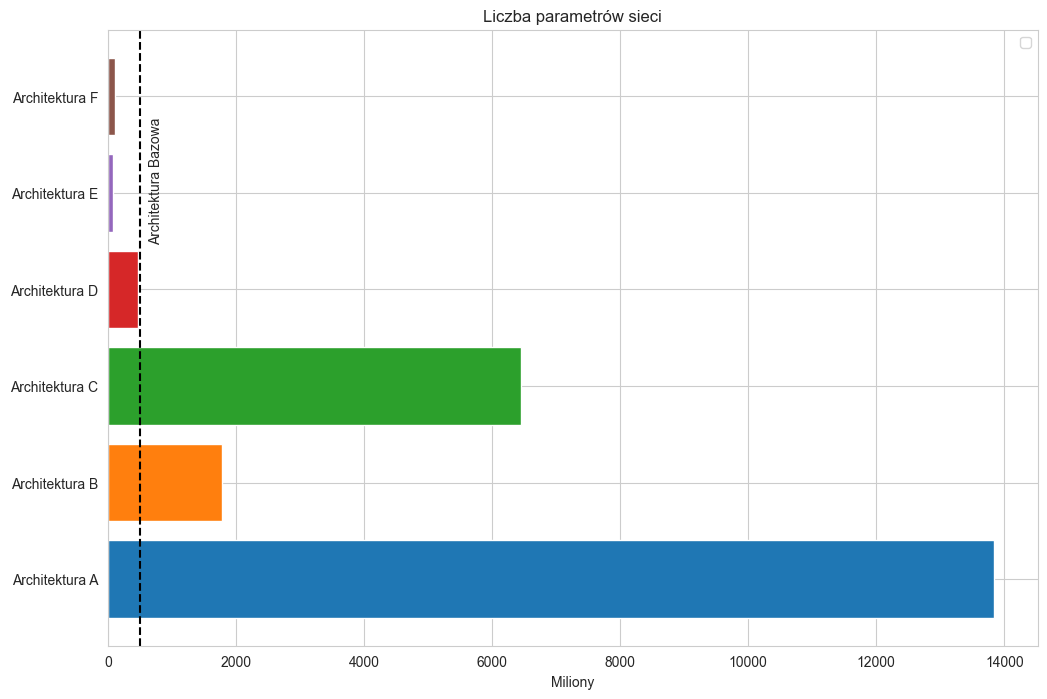

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


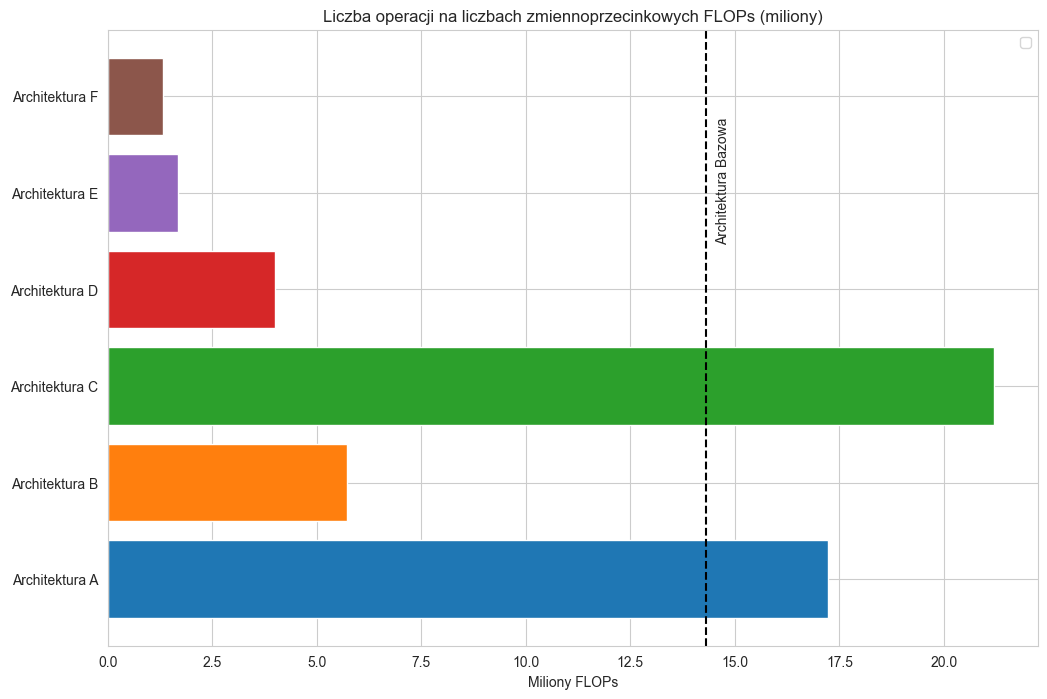

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


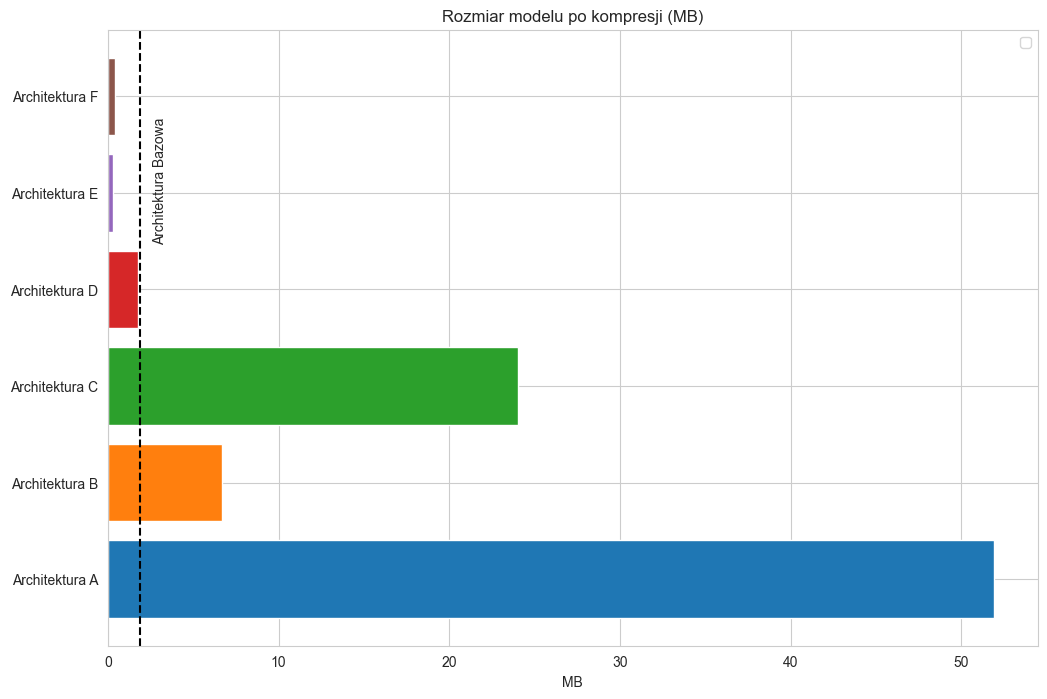

In [251]:
models_cmap = plt.get_cmap("tab10")
models_cmap_list = [models_cmap(i) for i in range(len(model_labels))] 
models_cmap_list = models_cmap_list[:-1]

# get Baseline values
baseline_values = final_summary[final_summary["model"] == "Architektura Bazowa"].copy()

# remove Baseline from the dataframe
final_summary_no_baseline = final_summary[final_summary["model"] != "Architektura Bazowa"]

# display number of parameters
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

#final_summary = final_summary.sort_values(by="thousands of parameters", ascending=False)
ax.barh(final_summary_no_baseline["model"], final_summary_no_baseline["milions of parameters"], color=models_cmap_list)
# draw baseline as a black dotted line
ax.axvline(baseline_values["milions of parameters"].values, color="black", linestyle="--")
# annotate with a text that says "Architektura Bazowa" on the right side of the plot. Draw it sideways
ax.annotate("Architektura Bazowa", xy=(baseline_values["milions of parameters"].values, 0), xytext=(baseline_values["milions of parameters"].values + 150, 3.5), rotation=90)

ax.set_title("Liczba parametrów sieci")
ax.set_xlabel("Miliony")

ax.legend()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

#final_summary = final_summary.sort_values(by="milions of flops", ascending=False)
ax.barh(final_summary_no_baseline["model"], final_summary_no_baseline["milions of flops"], color=models_cmap_list)
# draw baseline as a black dotted line
ax.axvline(baseline_values["milions of flops"].values, color="black", linestyle="--")
# annotate with a text that says "Architektura Bazowa" on the right side of the plot. Draw it sideways
ax.annotate("Architektura Bazowa", xy=(baseline_values["milions of flops"].values, 0), xytext=(baseline_values["milions of flops"].values + 0.25, 3.5), rotation=90)
ax.set_title("Liczba operacji na liczbach zmiennoprzecinkowych FLOPs (miliony)")
ax.set_xlabel("Miliony FLOPs")

ax.legend()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.barh(final_summary_no_baseline["model"], final_summary_no_baseline["compressed disk size (MB)"], color=models_cmap_list)
# draw baseline as a black dotted line
ax.axvline(baseline_values["compressed disk size (MB)"].values, color="black", linestyle="--")
# annotate with a text that says "Architektura Bazowa" on the right side of the plot. Draw it sideways
ax.annotate("Architektura Bazowa", xy=(baseline_values["compressed disk size (MB)"].values, 0), xytext=(baseline_values["compressed disk size (MB)"].values + 0.75, 3.5), rotation=90)
ax.set_title("Rozmiar modelu po kompresji (MB)")
ax.set_xlabel("MB")

ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


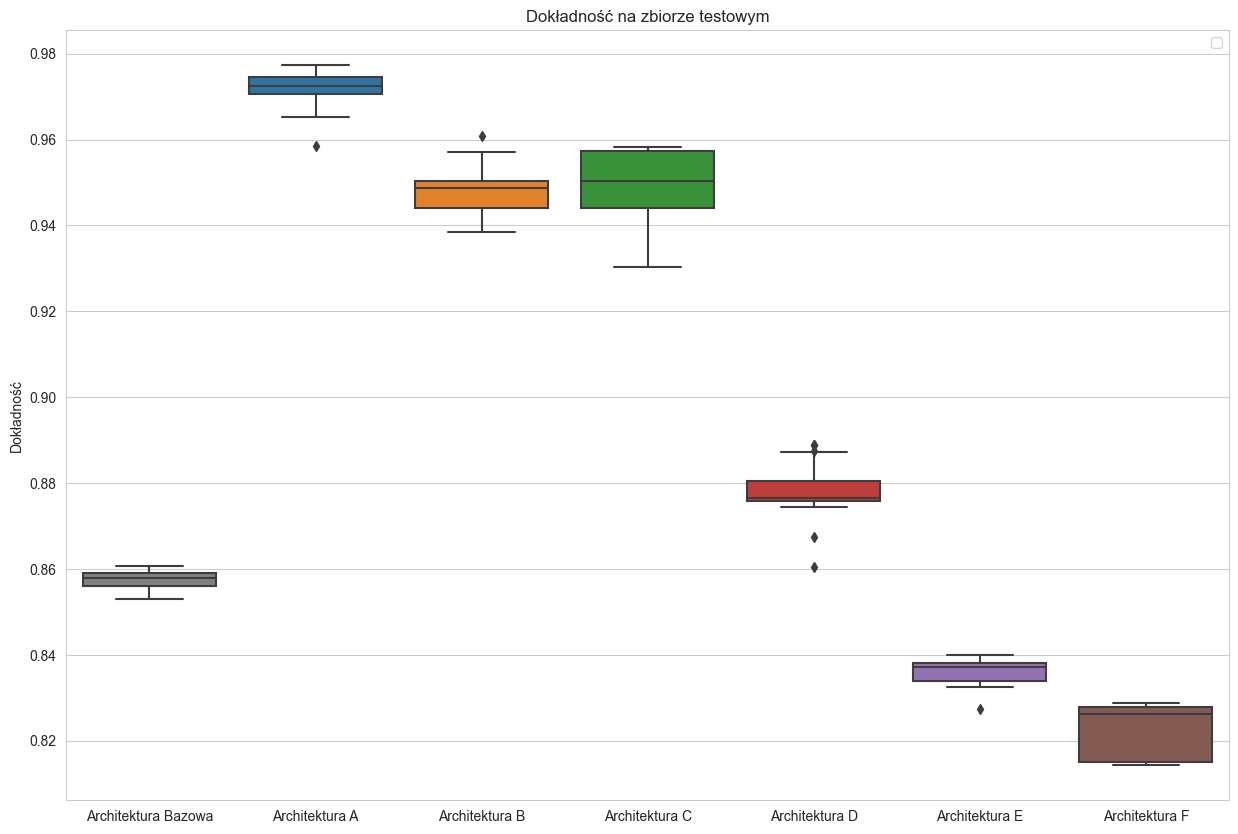

In [249]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

#ax.boxplot(results_all.values)
# copy models_cmap_list and add gray color to the beginning
boxplot_cmap = models_cmap_list.copy()
boxplot_cmap.insert(0, "gray")
sns.boxplot(data=results_all, ax=ax, palette=boxplot_cmap)
ax.set_xticklabels(results_all.columns)
ax.set_title("Dokładność na zbiorze testowym")
ax.set_ylabel("Dokładność")

# show legend
ax.legend()
plt.show()

In [230]:
final_summary

,model,milions of flops,milions of parameters,compressed disk size (MB)
6,Architektura Bazowa,14.308427,497.721,1.869020
0,Architektura A,17.222891,13831.385,51.892352
1,Architektura B,5.713035,1779.161,6.707222
2,Architektura C,21.186220,6455.897,24.046845
3,Architektura D,4.004109,474.377,1.776690
4,Architektura E,1.682988,87.929,0.330688
5,Architektura F,1.312411,111.961,0.420161


/tmp/ipykernel_22194/908029025.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  num_param_acc = num_param_acc.append(model_num_param_acc)
/tmp/ipykernel_22194/908029025.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  num_param_acc = num_param_acc.append(model_num_param_acc)
/tmp/ipykernel_22194/908029025.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  num_param_acc = num_param_acc.append(model_num_param_acc)
/tmp/ipykernel_22194/908029025.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  num_param_acc = num_param_acc.append(model_num_param_acc)
/tmp/ipykernel_22194/908029025.py:18: FutureWarning: The frame.append method

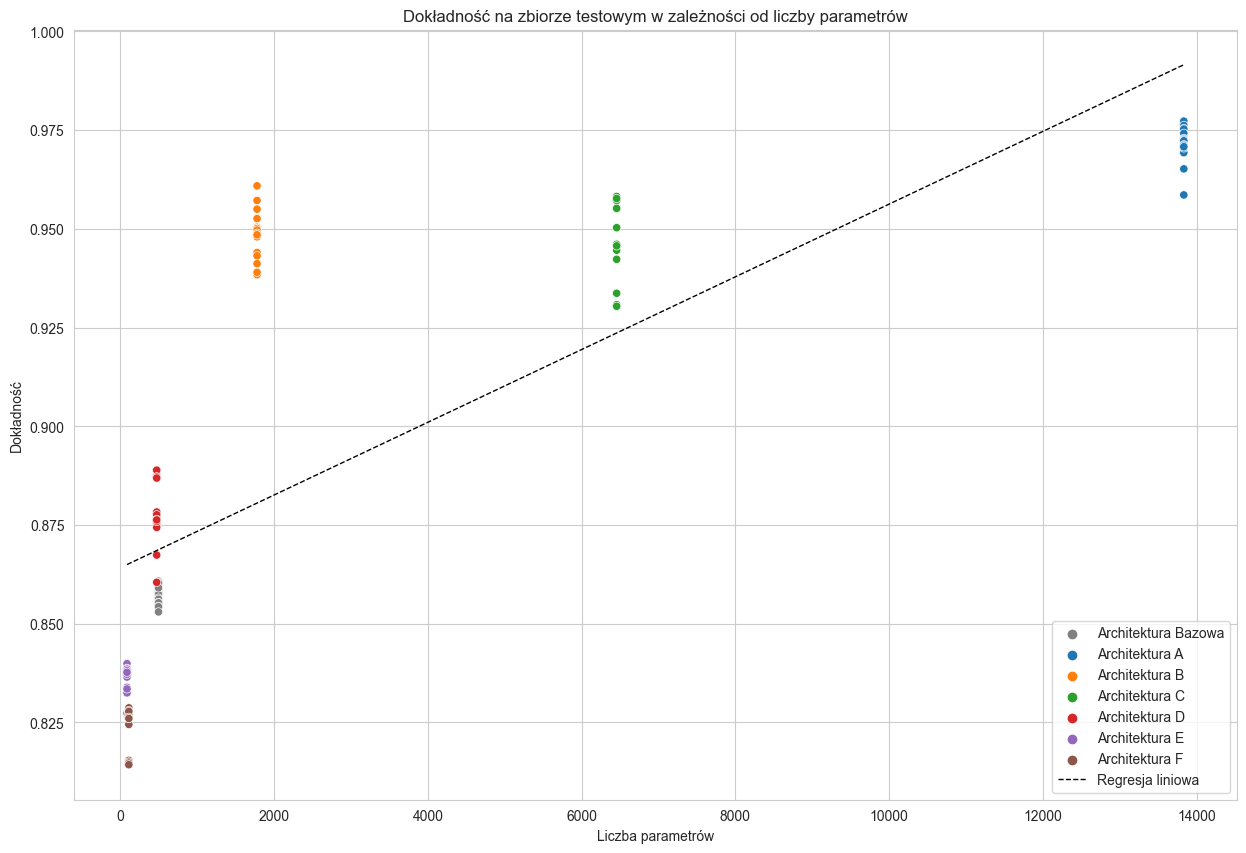

In [245]:
# based on results_all and final_summary, plot scatterplot accuracy vs. number of parameters where x axis is number of parameters and y axis is accuracy and each dot is an observation from results_all
# and each dot is colored based on the model it belongs to

# create a new dataframe with columns: model, accuracy, num_parameters
num_param_acc = pd.DataFrame(columns=["model", "accuracy", "num_parameters"])

for model in results_all.columns:
    # get accuracy values for the model
    acc = results_all[model]
    # get number of parameters for the model
    num_params = final_summary[final_summary["model"] == model]["milions of parameters"].values[0]
    # create a new dataframe with columns: model, accuracy, num_parameters
    model_num_param_acc = pd.DataFrame(columns=["model", "accuracy", "num_parameters"])
    model_num_param_acc["model"] = [model] * len(acc)
    model_num_param_acc["accuracy"] = acc
    model_num_param_acc["num_parameters"] = num_params
    # append the dataframe to the main dataframe
    num_param_acc = num_param_acc.append(model_num_param_acc)

# plot the scatterplot

fig, ax = plt.subplots(figsize=(15, 10))

# plot the scatterplot
sns.scatterplot(data=num_param_acc, x="num_parameters", y="accuracy", hue="model", ax=ax, palette=boxplot_cmap)

# show legend

# set title
ax.set_title("Dokładność na zbiorze testowym wszystkich znaków")



# plot reggression line as thin black dashed line with label "Regresja liniowa"
sns.regplot(data=num_param_acc, x="num_parameters", y="accuracy", ax=ax, color="black", scatter=False, line_kws={"linestyle":"--", "linewidth":1}, ci=None, label="Regresja liniowa")
ax.set_xlabel("Liczba parametrów")
ax.set_ylabel("Dokładność")
ax.legend(loc="lower right")

plt.show()

# Porównanie wyników Architektury E i Bazowej

<AxesSubplot: xlabel='architecture', ylabel='accuracy'>

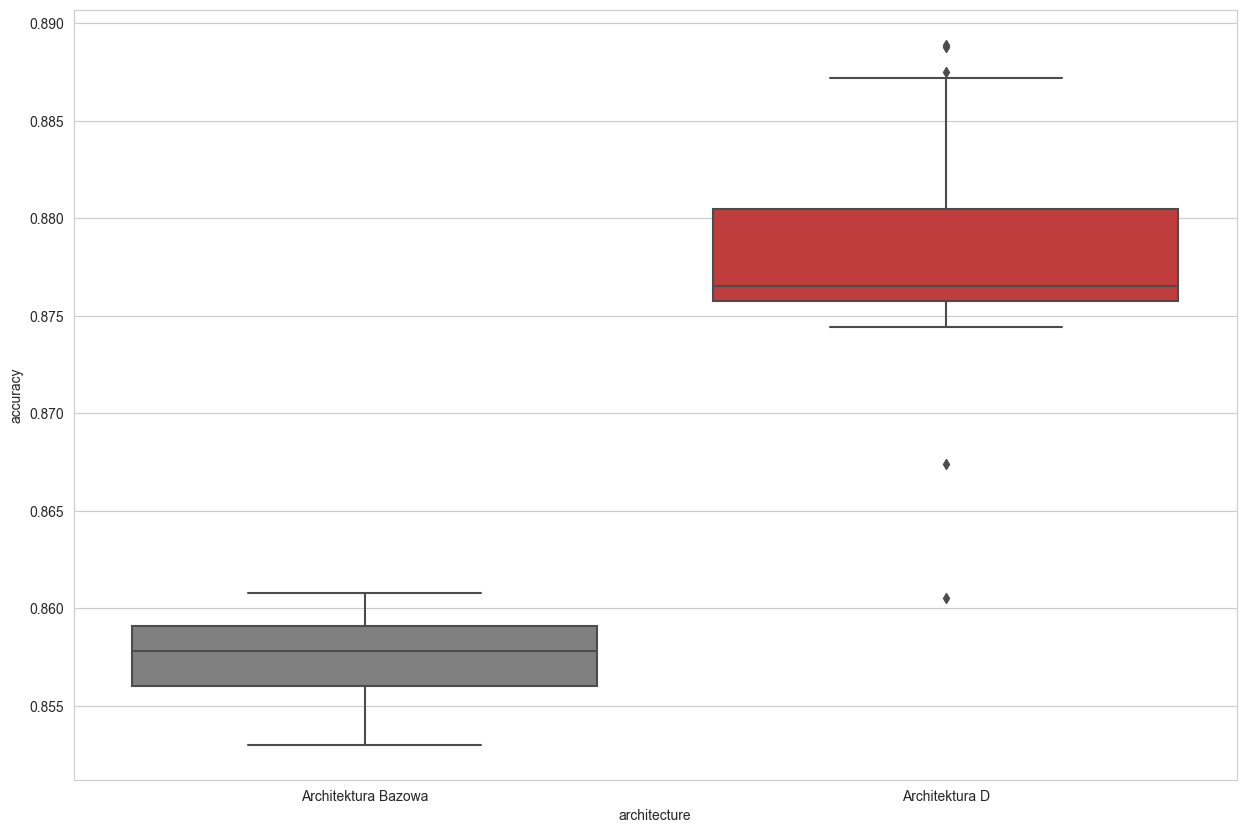

In [265]:
t_test_data = results_all[["Architektura Bazowa", "Architektura D"]]
t_test_data_plot = pd.DataFrame(columns=["architecture", "accuracy"])
t_test_data_plot["architecture"] = ["Architektura Bazowa"] * len(t_test_data["Architektura Bazowa"]) + ["Architektura D"] * len(t_test_data["Architektura D"])
t_test_data_plot["accuracy"] = t_test_data["Architektura Bazowa"].values.tolist() + t_test_data["Architektura D"].values.tolist()

fig, ax = plt.subplots(figsize=(15, 10))

sns.boxplot(data=t_test_data_plot, x="architecture", y="accuracy", ax=ax, palette=[boxplot_cmap[0], boxplot_cmap[4]])

In [266]:
import scipy.stats as stats

# perform paired t-test to compare the accuracy of the two models
t_test_results = stats.ttest_rel(t_test_data["Architektura D"], t_test_data["Architektura Bazowa"], alternative="greater")

p_value = t_test_results[1]

if p_value < 0.05:
    print("P-value: {:.3f}. Odrzucamy hipotezę zerową. Architektura D jest lepsza od Architektury Bazowej.".format(p_value))
else:
    print("P-value: {:.3f}. Nie odrzucamy hipotezy zerowej. Architektura D nie jest lepsza od Architektury Bazowej.".format(p_value))

P-value: 0.000. Odrzucamy hipotezę zerową. Architektura D jest lepsza od Architektury Bazowej.


# Porównanie wyników architektur B i C

Text(0, 0.5, 'Dokładność')

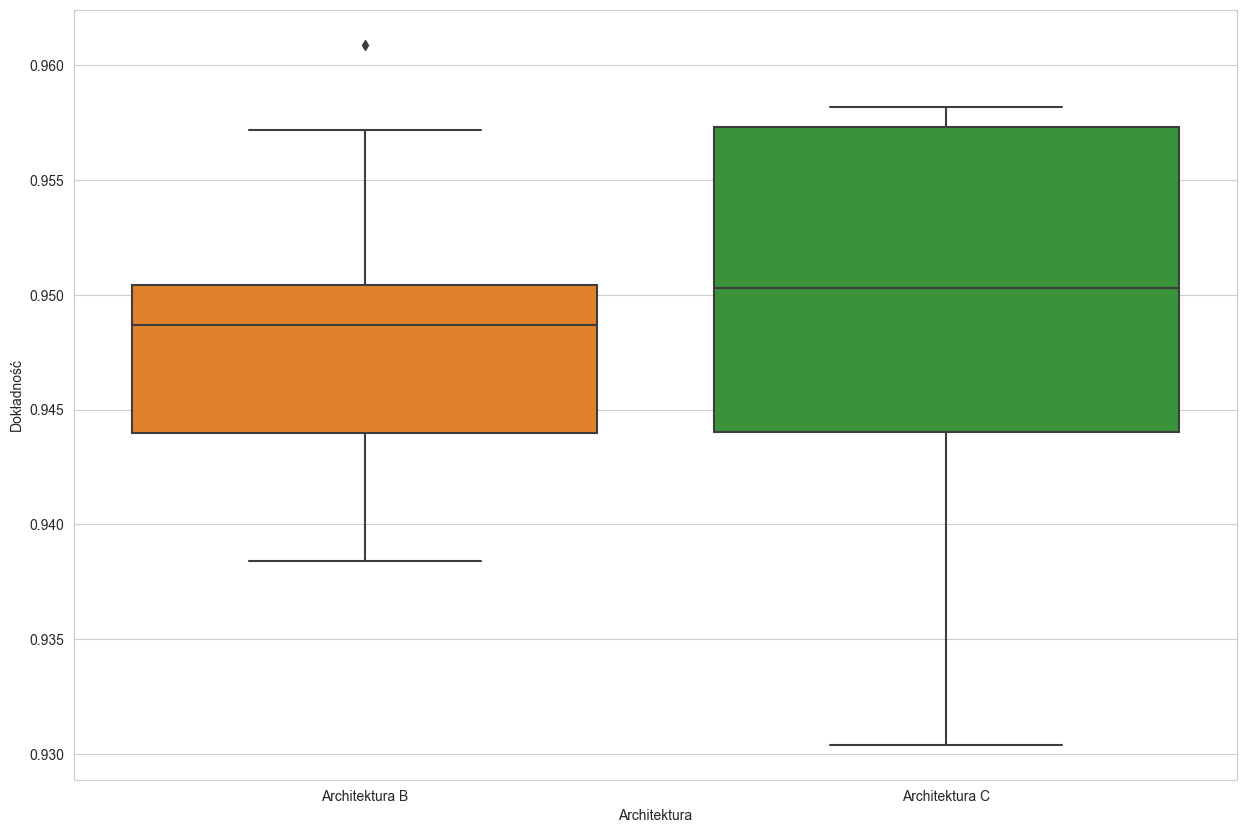

In [269]:
t_test_data = results_all[["Architektura B", "Architektura C"]]
t_test_data_plot = pd.DataFrame(columns=["architecture", "accuracy"])
t_test_data_plot["architecture"] = ["Architektura B"] * len(t_test_data["Architektura B"]) + ["Architektura C"] * len(t_test_data["Architektura C"])
t_test_data_plot["accuracy"] = t_test_data["Architektura B"].values.tolist() + t_test_data["Architektura C"].values.tolist()

fig, ax = plt.subplots(figsize=(15, 10))

sns.boxplot(data=t_test_data_plot, x="architecture", y="accuracy", ax=ax, palette=[boxplot_cmap[2], boxplot_cmap[3]])

ax.set_xlabel("Architektura")
ax.set_ylabel("Dokładność")

In [271]:
# perform paired t-test to compare the accuracy of the two models
t_test_results = stats.ttest_rel(t_test_data["Architektura B"], t_test_data["Architektura C"], alternative="two-sided")

p_value = t_test_results[1]

if p_value < 0.05:
    print("P-value: {:.3f}. Odrzucamy hipotezę zerową. Architektura C jest lepsza od Architektury B.".format(p_value))
else:
    print("P-value: {:.3f}. Nie odrzucamy hipotezy zerowej. Architektura C nie jest lepsza od Architektury B.".format(p_value))

P-value: 0.995. Nie odrzucamy hipotezy zerowej. Architektura C nie jest lepsza od Architektury B.
